In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from math import sqrt


/tmp/ipykernel_22919/984002868.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_disasters = df.resample('M').size()


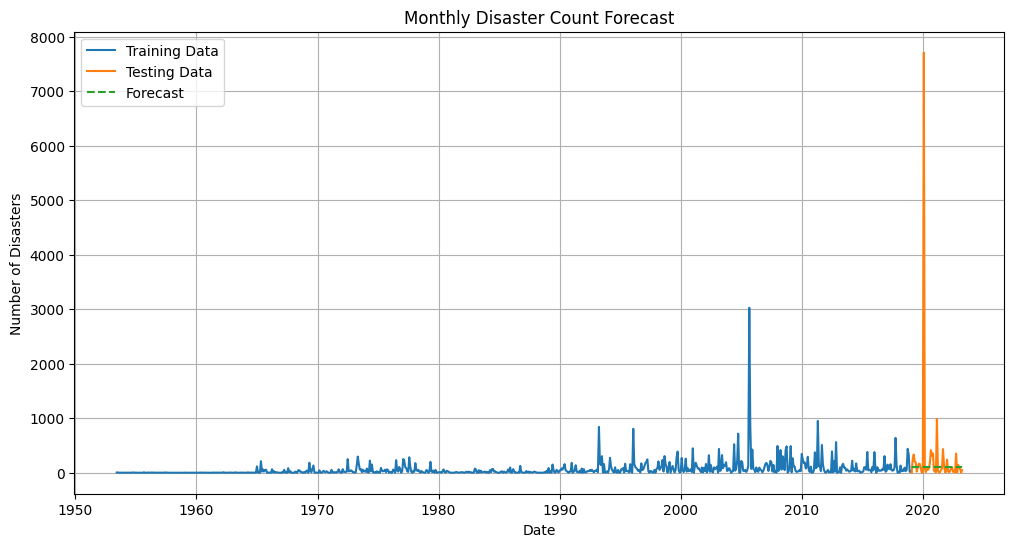

Root Mean Squared Error: 1077.3335696259824


In [58]:

# Load and clean data
df = pd.read_csv('../data/us_disaster_declarations.csv')
mainland_states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", 
                   "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
                   "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
                   "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
                   "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

df = df[df['state'].isin(mainland_states)]
columns_to_drop = [
    "fema_declaration_string", "fips", "place_code", "hash", "id", "last_refresh", 
    "last_ia_filing_date", "fy_declared", "ih_program_declared", "ia_program_declared", 
    "declaration_type", "pa_program_declared", "hm_program_declared", 
    "disaster_closeout_date", "declaration_request_number"
]
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)
df['incident_begin_date'] = pd.to_datetime(df['incident_begin_date'])
df = df.sort_values('incident_begin_date')
df.set_index('incident_begin_date', inplace=True)

# Monthly aggregation and "no disaster" feature
monthly_disasters = df.resample('M').size()
monthly_disasters_df = monthly_disasters.to_frame(name='disaster_count')
monthly_disasters_df['no_disaster'] = monthly_disasters_df['disaster_count'].apply(lambda x: 1 if x == 0 else 0)

# Train-test split
split_date = '2019-01-01'
train = monthly_disasters_df[:split_date]['disaster_count']
test = monthly_disasters_df[split_date:]['disaster_count']

# ARIMA model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Testing Data')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.title('Monthly Disaster Count Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Disasters')
plt.legend()
plt.grid()
plt.show()

# Evaluate model
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"Root Mean Squared Error: {rmse}")
